<a href="https://colab.research.google.com/github/alessandropequeno/PPGEEC-Deep-Learning-UFRN/blob/main/Questao2_deep_lista.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2-) Considere uma rede deep learning convolutiva (treinada) aplicada à classificação de
padrões em imagens. A base de dados considerada é a CIFAR-10 (pesquise). A referida
base de dados consiste de 60 mil imagens coloridas de 32x32 pixels, com 50 mil para treino
e 10 mil para teste. As imagens estão divididas em 10 classes, a saber: avião, navio, cami-
nhão, automóvel, sapo, pássaro, cachorro, gato, cavalo e cervo. Cada imagem possui apenas
um dos objetos da classe de interesse, podendo estar parcialmente obstruído por outros ob-
jetos que não pertençam a esse conjunto. Apresente o desempenho da rede no processo de
classificação usando uma matriz de confusão.
Obs. Pesquise e utilize uma rede neural convolucional - CNN já treinada

## **1. IMPORTANDO OS BIBLIOTECAS NECESSÁRIAS**

In [1]:
import torch
print(f'PyTorch version: {torch.__version__}')
from torch import nn, optim
from torch.utils.data import DataLoader

import torchvision
print (f'Torchvision version: {torchvision.__version__}')
from torchvision import datasets, models, transforms
from torchsummary import summary

import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

PyTorch version: 2.2.1+cu121
Torchvision version: 0.17.1+cu121


## **2. DEFININDO OS DEVICES**

In [2]:
## Definindo os DEVICES
print(f'GPU name: {torch.cuda.get_device_name()}\n')
device = 'cuda' if torch.cuda.is_available else 'cpu'
print(f'Device is: {device}\n')
print(f'Total number of GPUs: {torch.cuda.device_count()}')

GPU name: Tesla T4

Device is: cuda

Total number of GPUs: 1


## 3. APLICANDO A TRANSFORMAÇÃO

In [3]:
transform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(),
                               transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

In [4]:
weights = models.AlexNet_Weights.DEFAULT
get_=weights.transforms()
get_

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

## 4. CARREGANDO O DATASET CIFAR10
### Trata-se de de dados consiste de 60 mil imagens coloridas de 32x32 pixels, com 50 mil para treino e 10 mil para teste. As imagens estão divididas em 10 classes, a saber: avião, navio, caminhão, automóvel, sapo, pássaro, cachorro, gato, cavalo e cervo. Cada imagem possui apenas um dos objetos da classe de interesse, podendo estar parcialmente obstruído por outros objetos que não pertençam a esse conjunto.

In [5]:
train_dataset = datasets.CIFAR10(root='./data_src', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data_src', train=False, download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:05<00:00, 29510409.69it/s]


Extracting ./data_src/cifar-10-python.tar.gz to ./data_src
Files already downloaded and verified


In [6]:
print(f'Length of the train dataset: {len(train_dataset)}')
print(f'Length of the train dataset: {len(test_dataset)}')

Length of the train dataset: 50000
Length of the train dataset: 10000


In [7]:
print(f'Shape of the train dataset: {train_dataset.data.shape}')
print(f'Shape of the test dataset: {test_dataset.data.shape}')

Shape of the train dataset: (50000, 32, 32, 3)
Shape of the test dataset: (10000, 32, 32, 3)


In [8]:
train_dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [9]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

### 5. VISUALIZANDO ALGUMAS IMAGENS DE TREINAMENTO

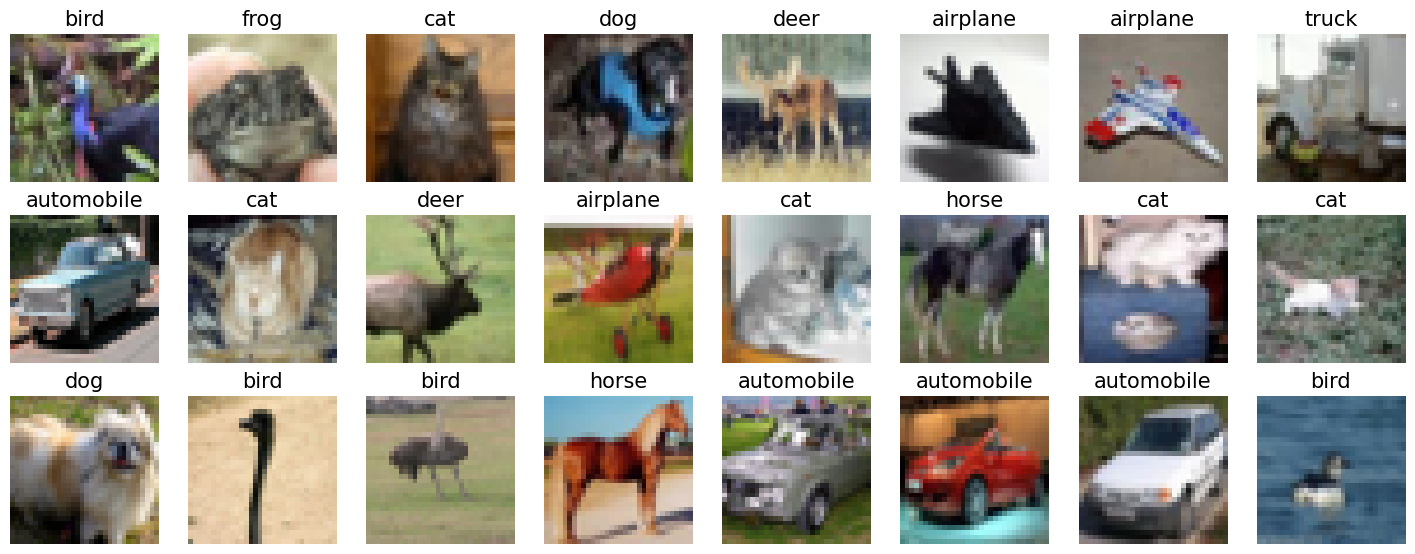

In [10]:
pos1 = 0
fig1 = plt.figure(figsize=(18,9))
for image1 in range(24,48):
  fig1.add_subplot(4,8,pos1+1)
  plt.imshow(train_dataset.data[image1])
  plt.title(classes[train_dataset.targets[image1]], fontsize=15)
  plt.axis('off')
  pos1 += 1

## 6. VISUALIZANDO ALGUMAS IMAGENS DE TESTE

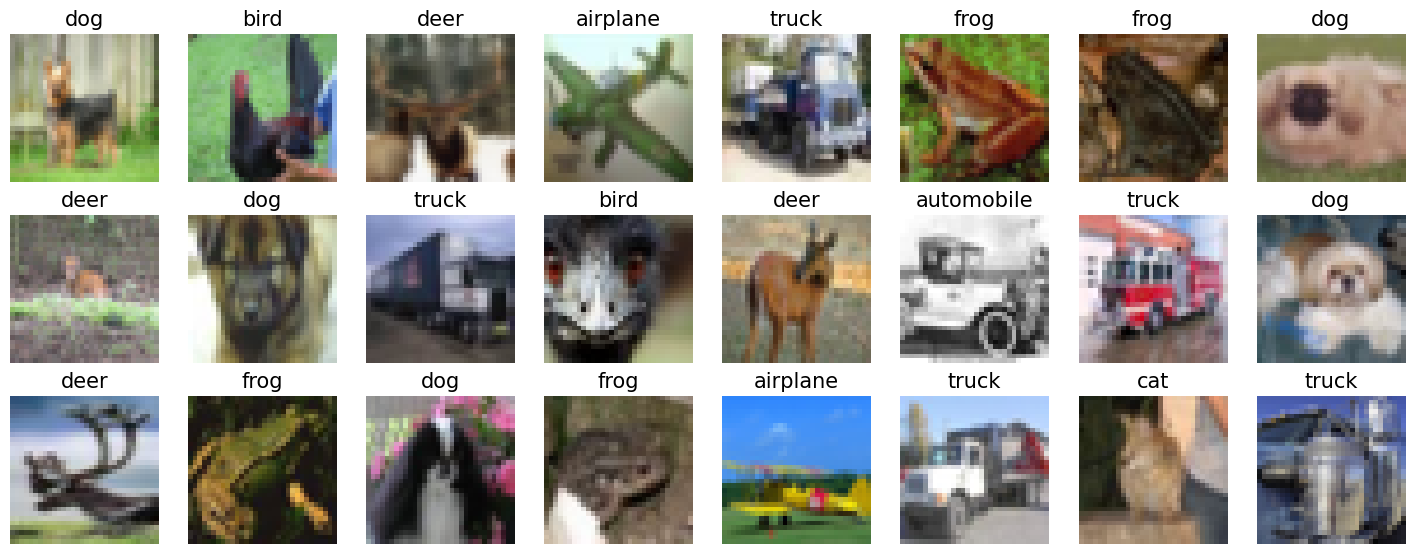

In [11]:

pos2 = 0
fig2 = plt.figure(figsize=(18,9))
for image2 in range(24,48):
  fig2.add_subplot(4,8,pos2+1)
  plt.imshow(test_dataset.data[image2])
  plt.title(classes[test_dataset.targets[image2]], fontsize=15)
  plt.axis('off')
  pos2 += 1

## 7. DEFININDO O DATALOADERS

In [12]:
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True,drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False,drop_last=True)

In [13]:
print(f'Length of the train dataloader: {len(train_dataloader)}')
print(f'Length of the test dataloader: {len(test_dataloader)}')

Length of the train dataloader: 1562
Length of the test dataloader: 312


## 8. A ARQUITETURA DE REDE PRÉ-TREINADA (AlexNet)

In [14]:
alex_net = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 160MB/s]


## 9. VISUALIZAÇÃO DA ARQUITETURA NO MODELO PRÉ-TREINADO (AlexNet)

In [15]:
model = alex_net.to(device)
summary (model,input_size=(3,224,224))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [16]:
print(model.parameters)

<bound method Module.parameters of AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=92

## 10. ARQUITETURA DE REDE PRÉ-TREINADA MODIFICADA ('modified_ALexNet') PARA IMAGNES CIFAR10

In [17]:
## 9. Modified pretrained network ('modified_ALexNet') architecture for CIFAR10 images

modified_ALexNet = models.alexnet(pretrained=True)
for param in modified_ALexNet.parameters():
  param.requires_grad = False

modified_ALexNet.avgpool = nn.AdaptiveAvgPool2d(output_size=(2,2))
modified_ALexNet.classifier = nn.Sequential()
modified_ALexNet.classifier.add_module('drop1', nn.Dropout(p=0.5))
modified_ALexNet.classifier.add_module('linr1', nn.Linear(in_features=1024, out_features=512))
modified_ALexNet.classifier.add_module('relu1', nn.ReLU(True))
modified_ALexNet.classifier.add_module('drop2', nn.Dropout(p=0.5))
modified_ALexNet.classifier.add_module('linr2', nn.Linear(in_features=512, out_features=512))
modified_ALexNet.classifier.add_module('relu2', nn.ReLU(True))
modified_ALexNet.classifier.add_module('drop3', nn.Dropout(p=0.5))
modified_ALexNet.classifier.add_module('linr3', nn.Linear(in_features=512, out_features=10))

In [18]:
modified_model = modified_ALexNet.to(device)
#summary(modified_model, input_size=(32,3,224,224))

In [19]:
print(modified_model.parameters)

<bound method Module.parameters of AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(2, 2))
  (classifier): Sequential(
    (drop1): Dropout(p=0.5, inplace=False)
    (linr1): Linear(in_fea

## 11. DEFINIÇÃO DO BATCH DE TREINO

In [20]:
def train_batch(data, labels, model, criterion, optimizer):
  model.train()
  data = data.to(device)
  labels = labels.to(device)
  output = model(data)
  loss = criterion(output, labels)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  return loss

## 12. DEFINIÇÃO DO BATCH DE TESTE

In [21]:
with torch.inference_mode():
  def test_batch(data, labels, model, criterion):
    model.eval()
    data = data.to(device)
    labels = labels.to(device)
    output = model(data)
    loss = criterion(output, labels)
    return loss

## 13. DEFINIÇÃO DA FUNÇÃO ACURÁCIA

In [22]:
with torch.inference_mode():
  def accuracy(data, labels, model):
    model.eval()
    data = data.to(device)
    labels = labels.to(device)
    output = model(data)
    _, pred_labels = output.max(-1)
    correct = (pred_labels == labels)
    return correct.cpu().detach().numpy().tolist()


## 14. CONFIGURAÇÃO DO MODELO DE TREINO ('modified_AlesNet'), FUNÇÃO DE PERDA (LOSS) E OTIMIZADOR

In [23]:
model_to_train = modified_ALexNet.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_to_train.parameters(), lr=0.001)

In [25]:
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

n_epochs = 5

train_loss, test_loss = [],[]
train_accuracy, test_accuracy = [],[]

for epoch in range(n_epochs):
  train_losses, test_losses = [],[]
  train_accuracies, test_accuracies = [],[]

  for data, labels in train_dataloader:
    trn_batch_loss = train_batch(data, labels, model_to_train, criterion, optimizer)
    train_losses.append(trn_batch_loss.item())
    trn_batch_correct = accuracy(data, labels, model_to_train)
    train_accuracies.extend(trn_batch_correct)
  train_per_epoch_loss = np.array(train_losses).mean()
  train_per_epoch_accuracy = np.mean(train_accuracies)

  for data, labels in test_dataloader:
    tst_batch_loss = test_batch(data, labels, model_to_train, criterion)
    test_losses.append(tst_batch_loss.item())
    tst_batch_correct = accuracy(data, labels, model_to_train)
    test_accuracies.extend(tst_batch_correct)
  test_per_epoch_loss = np.array(test_losses).mean()
  test_per_epoch_accuracy = np.mean(test_accuracies)

  train_loss.append(train_per_epoch_loss)
  train_accuracy.append(train_per_epoch_accuracy)
  test_loss.append(test_per_epoch_loss)
  test_accuracy.append(test_per_epoch_accuracy)

  print(f'Epoch: {epoch+1}/{n_epochs} | Train loss: {train_per_epoch_loss:.4f}| ',end='')
  print(f'Test loss: {test_per_epoch_loss:.4f} | Train accuracy: {train_per_epoch_accuracy:.4f}| ',end='')
  print(f'Test accuracy: {test_per_epoch_accuracy:.4f}')

Epoch: 1/5 | Train loss: 1.0425| Test loss: 0.7091 | Train accuracy: 0.7382| Test accuracy: 0.7785
Epoch: 2/5 | Train loss: 0.9072| Test loss: 0.6808 | Train accuracy: 0.7908| Test accuracy: 0.7695
Epoch: 3/5 | Train loss: 0.8830| Test loss: 0.6569 | Train accuracy: 0.8017| Test accuracy: 0.7815
Epoch: 4/5 | Train loss: 0.8624| Test loss: 0.6647 | Train accuracy: 0.8082| Test accuracy: 0.7934
Epoch: 5/5 | Train loss: 0.8452| Test loss: 0.6756 | Train accuracy: 0.8108| Test accuracy: 0.7871


## 15. GRÁFICO DA LOSS E ACURÁCIA

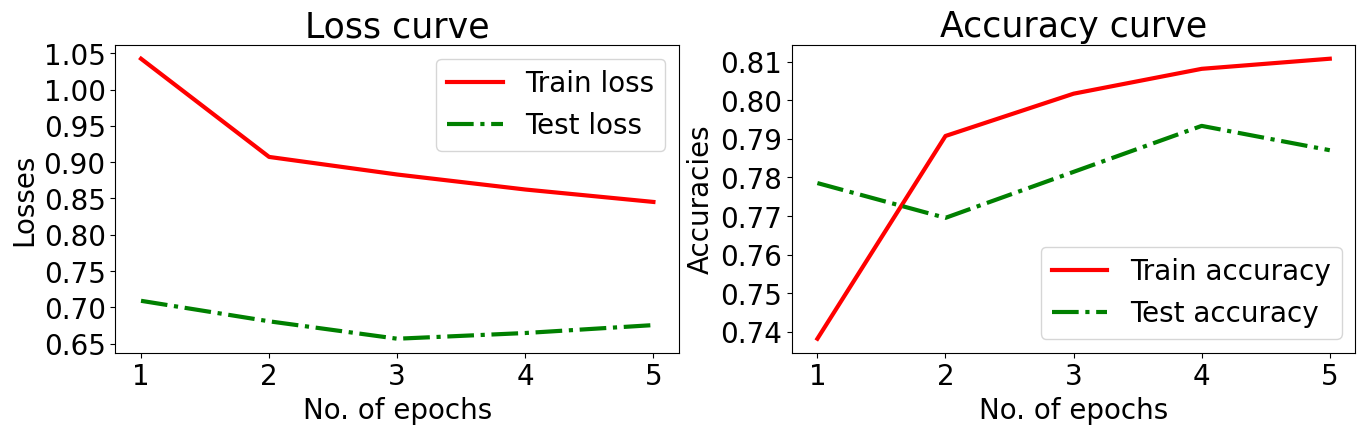

In [26]:
epochs = np.arange(5)+1
figure = plt.figure(figsize=(16,4))
figure.add_subplot(1,2,1)
plt.plot(epochs, train_loss, 'r-', linewidth=3, label='Train loss')
plt.plot(epochs, test_loss, 'g-.', linewidth=3, label='Test loss')
plt.title('Loss curve', fontsize=25)
plt.xlabel('No. of epochs', fontsize=20)
plt.ylabel('Losses', fontsize=20)
plt.xticks([1,2,3,4,5], fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

figure.add_subplot(1,2,2)
plt.plot(epochs, train_accuracy, 'r-', linewidth=3, label='Train accuracy')
plt.plot(epochs, test_accuracy, 'g-.', linewidth=3, label='Test accuracy')
plt.title('Accuracy curve', fontsize=25)
plt.xlabel('No. of epochs', fontsize=20)
plt.ylabel('Accuracies', fontsize=20)
plt.xticks([1,2,3,4,5], fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

## 16. MODELO DE PREDIÇÃO

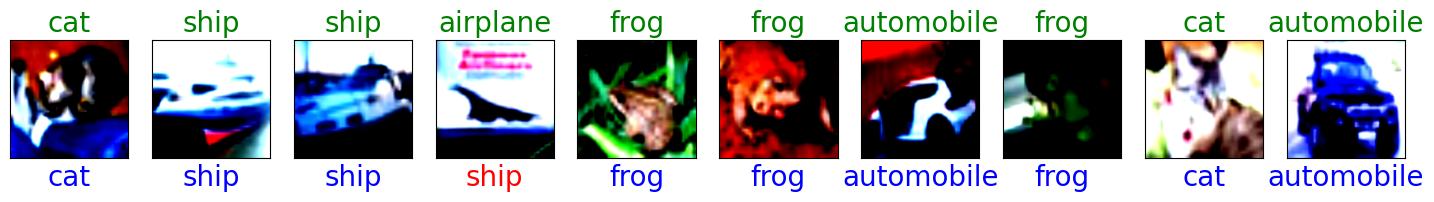

In [30]:
SAMPLES = []
LABELS = []
for a in range(10):
  SAMPLES.append(test_dataset[a])
  output = model_to_train.cpu()(SAMPLES[a][0].unsqueeze(0))
  _, pred_labels = output.max(-1)
  LABELS.append(int (pred_labels))

fig, ax = plt.subplots(1,10, figsize=(18,5))
for i in range(10):
  ax[i].imshow(torch.clamp(SAMPLES[i][0], min=0, max=1).permute(1,2,0))
  ax[i].set_title(classes[SAMPLES[i][1]], fontsize=20).set_color('g')  #actual label
  if SAMPLES[i][1] == LABELS[i]:
    ax[i].set_xlabel(classes[LABELS[i]], fontsize=20).set_color('b') # correctly predicted labels
  else:
    ax[i].set_xlabel(classes[LABELS[i]], fontsize=20).set_color('r') # wrongly predicted labels
  ax[i].set_xticks([])
  ax[i].set_yticks([]);
